## Import Libraries

In [1]:
#importing all neccessary liberaries.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import seaborn as sns
import warnings

## Import Dataset File

In [2]:
df=pd.read_csv('customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Unnamed: 10,status
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon,NaN,NaN
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul,NaN,NaN
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity,NaN,NaN
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM,NaN,NaN
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon,NaN,NaN
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul,NaN,NaN
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity,NaN,NaN
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park,NaN,NaN


### Our Variable Features:
    
- **invoice_no** : unique invoice number for every purchasing.
- **customer_id** : unique id for every Customer.
- **gender** : Male,Female.
- **age** : in that column every customers age is define.
- **Category** : product category is define in that column
               - clothing,shoes,books,toy,cosmetics,food & beverage, souvenir,Technology are the categores of shoping.
- **quantity** : how many products purchased by partiulor customers is define in that column.
- **price** :how much customer spent on shoping has been written on this column
- **Payment_method** :three payment method is written in that column cash,credit and debit.
- **Invoice_Date** : in this column,the customer has done there shoping on which date is written
- **shoping_mall** : from which shoping mall people do shopings it is written in that column 
- **unnamed: 10** : no data is present in that column.
- **Status** : no data is present in that column.

# Exploratory Data Analysis

In [3]:
#for data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
 10  Unnamed: 10     0 non-null      float64
 11  status          0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 9.1+ MB


In [4]:
#it shows how many column and rows are there
df.shape

(99457, 12)

In [5]:
#its provide columns name
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall',
       'Unnamed: 10', 'status'],
      dtype='object')

In [6]:
#for knowing in data duplicates value are present or not.
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
Unnamed: 10           0
status                0
dtype: int64

## Data Cleaning

In [7]:
#its give null values if any columns have
df.isnull().sum()

invoice_no            0
customer_id           0
gender                0
age                   0
category              0
quantity              0
price                 0
payment_method        0
invoice_date          0
shopping_mall         0
Unnamed: 10       99457
status            99457
dtype: int64

There are two columns in which all the values are null so we drop both the columns.

In [8]:
df.drop(['status','Unnamed: 10'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

price table have float datatype so we convert that into int

#### change data type

In [10]:
df['price']=df['price'].astype('int')

In [11]:
df['price'].dtype

dtype('int32')

invoice_date column have object data type so we convert that datatype into datetime datatype.

In [12]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d-%m-%Y')

from invoice_date table extracting month and year and create new column for better analysis.

In [13]:
df['month'] = df['invoice_date'].dt.month

In [14]:
df['year'] = df['invoice_date'].dt.year

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  int32         
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  month           99457 non-null  int64         
 11  year            99457 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(4), object(6)
memory usage: 8.7+ MB


# Data Visualization

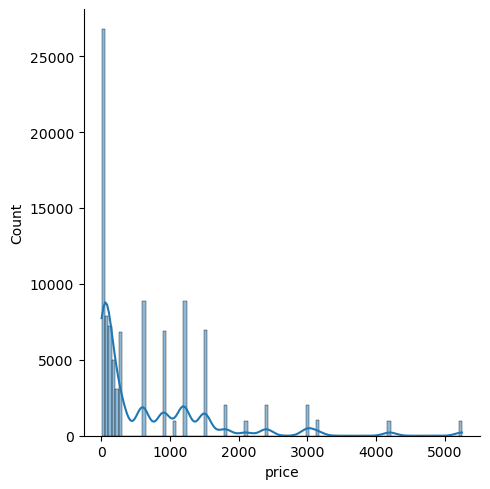

In [17]:
sns.displot(df['price'],kde=True)
plt.show()

- The percentage of shoping is high in between  0 to 500 price rate





<Axes: xlabel='category', ylabel='price'>

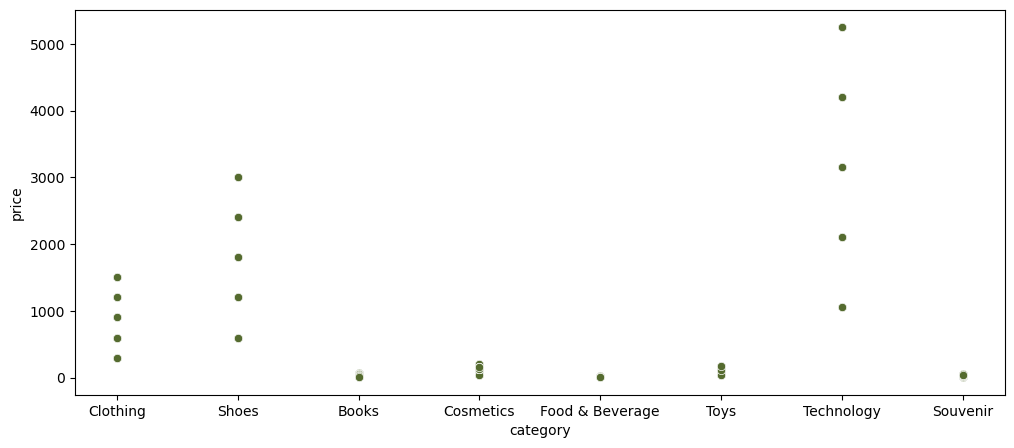

In [18]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,y='price',x='category',color='darkolivegreen')

- when i compare different categories with price values the result came to be high for technology and shoes 
- low for books,food&revenge and Souvnir

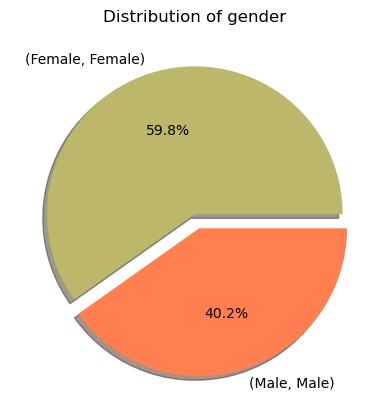

In [19]:
df.groupby('gender')['gender'].value_counts().plot.pie(autopct='%.1f%%',ylabel='',colors=['darkkhaki','coral'],explode=(0,0.1),shadow=True)
plt.title('Distribution of gender')
plt.show()

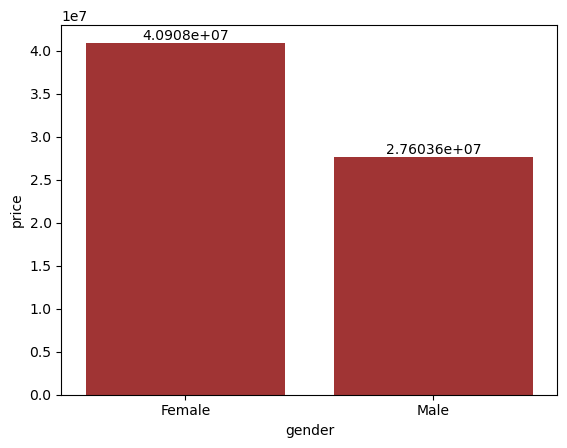

In [20]:
gen_amount= df.groupby(['gender'], as_index=False)['price'].sum().sort_values(by='price',ascending=False)
ax=sns.barplot(data=gen_amount,x='gender',y='price',color='firebrick')
for bars in ax.containers:
    ax.bar_label(bars)

1. maximum number  of shoping done by females

2. the female spend much money as they have done maximum number of shoping

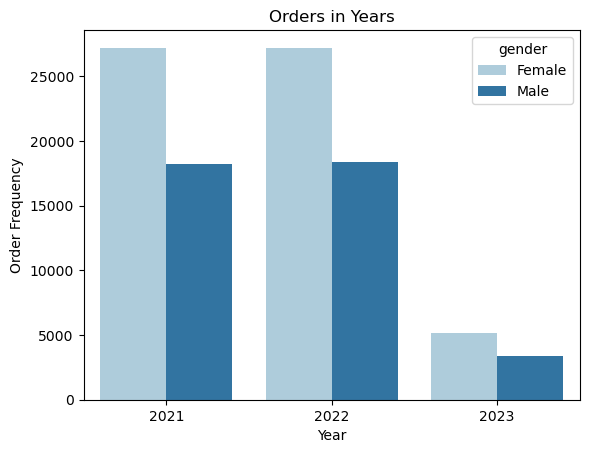

In [21]:
sns.countplot(data=df,x='year',hue='gender',palette='Paired')
plt.xlabel('Year')
plt.ylabel('Order Frequency')
plt.title('Orders in Years')
plt.show()

- the order frequency of the year 2021 and 2022 are equal
- the data of the year 2023 is slightly missing

<Axes: xlabel='age', ylabel='count'>

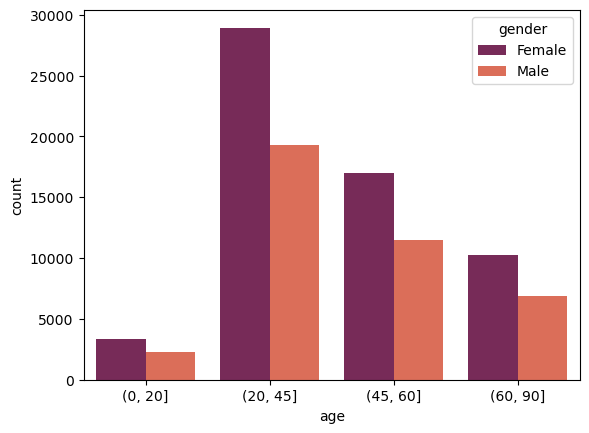

In [32]:
age_Group=pd.cut(df['age'],bins=[0,20,45,60,90])
sns.countplot(data=df,x=age_Group,hue='gender',palette='rocket')

- when we analyze with age group the mostly shopping is done in between the age of 20 to 45, which shows that the shopping is mostly done by the adults
- and next high range of shopping is done by the age of 45 to 60

<Figure size 1500x700 with 0 Axes>

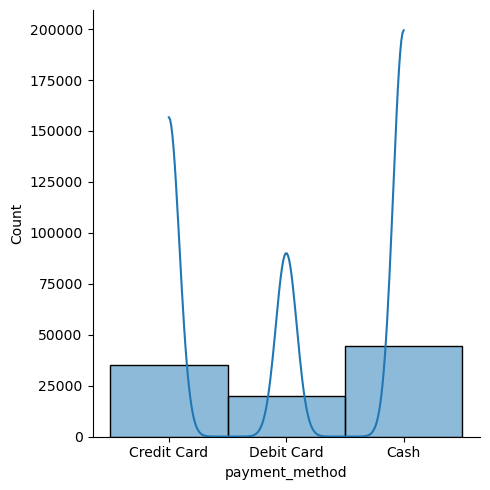

In [33]:
pm=df.payment_method.value_counts().plot
plt.figure(figsize=(15,7))
sns.displot(df,x='payment_method',kde=True)

<Axes: xlabel='payment_method', ylabel='count'>

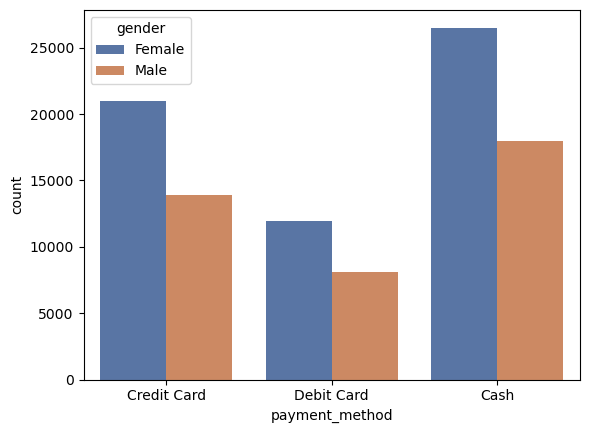

In [24]:
sns.countplot(df,x='payment_method',hue='gender',palette='deep')

- Most of the people has done their Payments through Cash and after that the second high range is for credit card.
- very least people is doing there payment through debit card

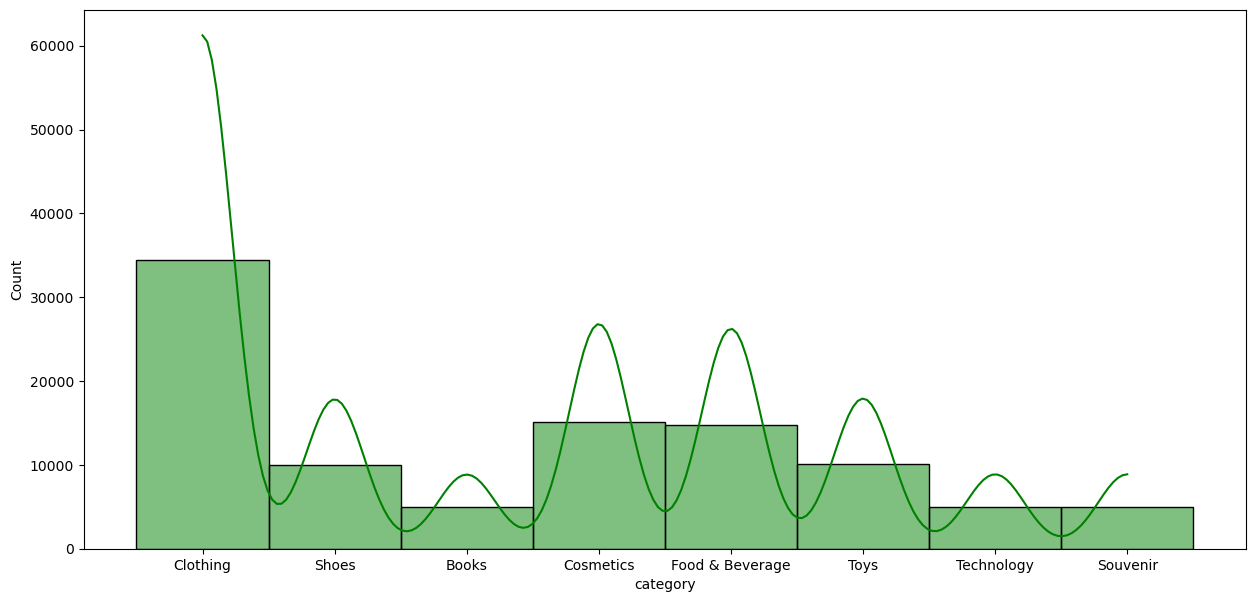

In [35]:
plt.figure(figsize=(15,7))
sns.histplot(x =df['category'],kde=True,color='green')

plt.show()

- clothing,cosmetics and food & beverage has high sale rather than other categories
- this categories is maybe higher because the female consumer rate is high

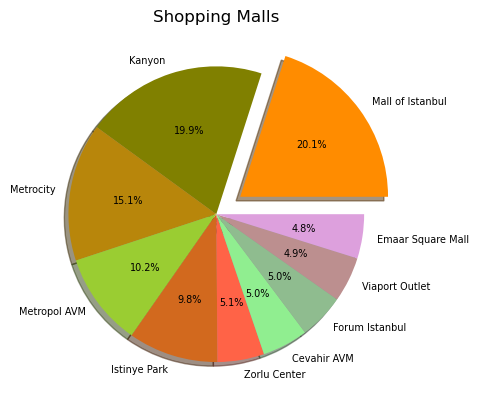

In [26]:
color=['darkorange','olive','darkgoldenrod','yellowgreen','chocolate','tomato','lightgreen','darkseagreen','rosybrown','plum']
df.shopping_mall.value_counts().plot.pie(ylabel='',title='Shopping Malls',shadow=True,autopct='%1.1f%%',colors=color,textprops={'fontsize':7},explode=(0.2,0,0,0,0,0,0,0,0,0))
plt.show()

<Axes: xlabel='price', ylabel='shopping_mall'>

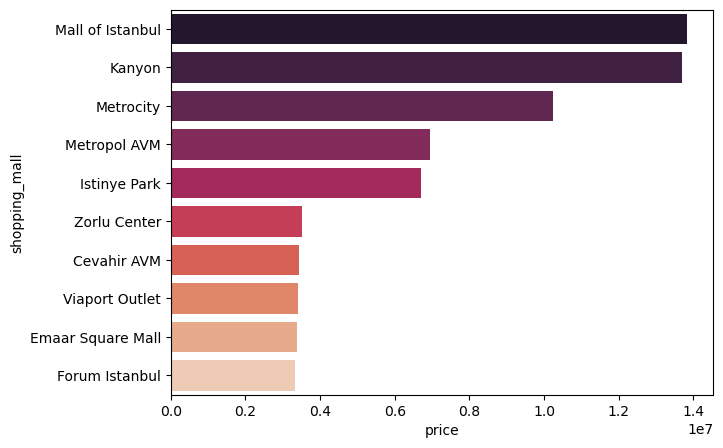

In [27]:
sales=df.groupby(['shopping_mall'], as_index=False)['price'].sum().sort_values(by='price',ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(y='shopping_mall',x='price',data=sales,palette='rocket')

- as the sale is high in the mall of istanbl,kanyon and metrocity so that the profit margin is also high in these shoping malls

In [28]:
quantity_year = df.groupby('month')['quantity'].sum()

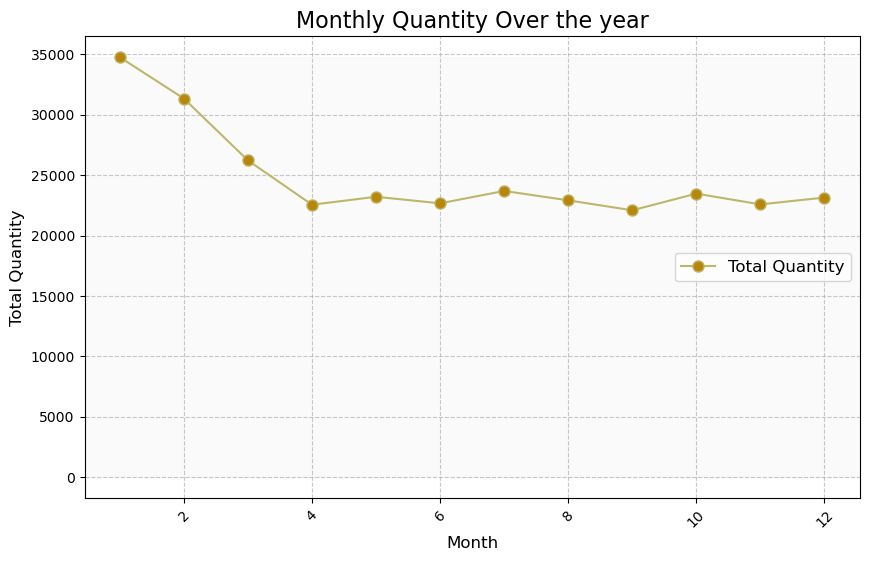

In [36]:
plt.figure(figsize=(10, 6))

# Plot the data with custom styling
plt.plot(quantity_year.index, quantity_year.values, marker='o', linestyle='-', color='darkkhaki', markersize=8, markerfacecolor='darkgoldenrod', label='Total Quantity')

plt.title("Monthly Quantity Over the year", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Customize the legend
plt.legend(fontsize=12)

# Add a background color for the plot
plt.axhspan(0, max(quantity_year.values), alpha=0.1, color='lightgray')

plt.show()

- the sale quantity is higher in the first three month.

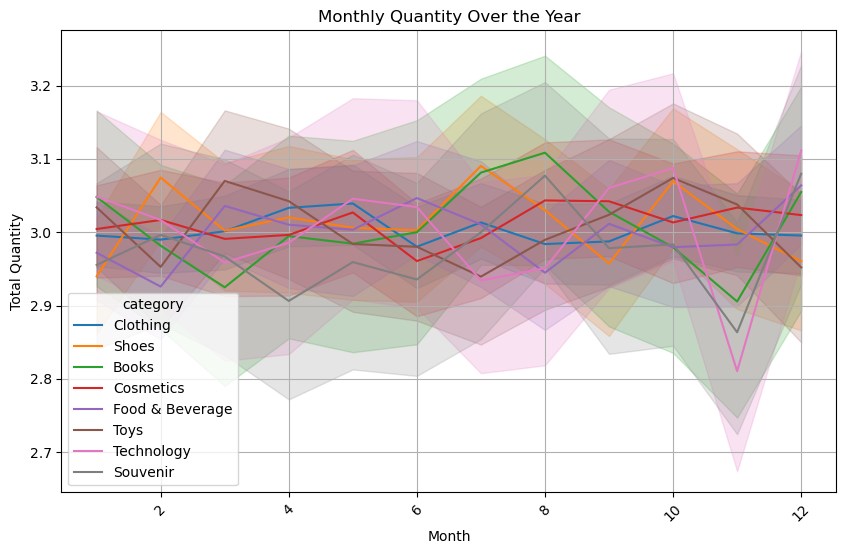

In [30]:

plt.figure(figsize=(10, 6))

# Use Seaborn's lineplot to differentiate by 'categories'
sns.lineplot(data=df, x='month', y='quantity', hue='category', )

plt.title("Monthly Quantity Over the Year")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

- The chart reveals the presence of seasonal trends in quantity for various categories. Some categories may experience fluctuations in quantity that correspond to specific months or seasons, which could be attributed to various factors like holidays, weather, or consumer behavior.

# Conclusion

- In This Dataset The Most Shoping Has Done By Females.
- Most Of The People Has Purchased The Products Which is Low In Rate.
- The Data Of The Year 2023 Is Missing.
- Clothes Are Mostly Purchased By People.